<a href="https://colab.research.google.com/github/thinkinginmath/ML-tutorials/blob/main/Linear_Regression_Essentials_ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learning Objectives**

In this tutorial, we aim to explore and comprehend the fundamentals and applications of Elastic Net Regression, one of the prominent techniques in Regularized Regression. By the end of this session, you will be able to:

1. **Understand Regularization in Regression:**
   - Gain insights into the necessity of regularization in regression models.
   - Differentiate between L1 (Lasso), L2 (Ridge), and Elastic Net regularization.

2. **Implement Elastic Net Regression:**
   - Grasp the mechanics of Elastic Net, which encapsulates the benefits of both Lasso and Ridge regression.
   - Implement Elastic Net Regression using Python and understand the role of its parameters.

3. **Interpret Model Outputs:**
   - Analyze and interpret the coefficients and predictions from Elastic Net Regression.
   - Understand how different parameters ($\alpha$ and $l1\_ratio$) impact model outcomes.

4. **Navigate through Parameter Tuning:**
   - Understand the significance of parameter tuning in Elastic Net.
   - Learn how to find the optimal parameters using cross-validation techniques like GridSearchCV.

5. **Evaluate Model Performance:**
   - Evaluate the performance of Elastic Net Regression using metrics like Mean Squared Error (MSE).
   - Understand how Elastic Net can be advantageous in scenarios involving numerous predictors and multicollinearity.

Through hands-on coding examples and analyses, we will navigate through the implementation and interpretation of Elastic Net Regression, laying a foundation for more advanced topics in regularized regression and model selection in subsequent tutorials.

## Copyright and Credits

### Copyright

© [Thinking in Math], [2023]. All Rights Reserved.

This work is licensed under the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/). To view a copy of this license, visit http://creativecommons.org/licenses/by-nc-sa/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

### Credits

- **Author:** [thinkinginmath]
- **GitHub:** [https://github.com/thinkinginmath]
- **YouTube:** [https://www.youtube.com/playlist?list=PLXpXgWDr4HM4R9zWxbOhP9B3v2fAahLTQ]

#### Resources and Acknowledgements


- **Inspiration:** The Stanford ISL book

#### Contact

For any queries or feedback, feel free to drop a comment on our [YouTube channel - Thinking In Math](https://www.youtube.com/playlist?list=PLXpXgWDr4HM4R9zWxbOhP9B3v2fAahLTQ).

---

**Note:** Please respect the rights and efforts of the content creators. If you wish to utilize this work, kindly give due credit and abide by the license terms.


### Outline for Elastic Net Regression Notebook

**1. Introduction to Elastic Net Regression**
   - Explanation of Elastic Net
   - Mathematical Formulation
   - When to use Elastic Net
   - Importing Necessary Libraries

**2. Simulating Data**
   - Creating a Synthetic Dataset
   - Visualizing the Data

**3. Implementing Elastic Net Regression**
   - Setting up the Elastic Net Model
   - Explanation of Hyperparameters $\alpha$ and $\lambda$
   - Fitting the Model
   - Evaluating Performance

**4. Hyperparameter Tuning in Elastic Net**
   - Explanation on the Importance of $\alpha$ and $\lambda$
   - Using GridSearchCV to Find Optimal Parameters
   - Visualizing the Effect of Hyperparameters on Coefficients

**5. Comparison with Lasso and Ridge**
   - Model Fit Comparison: Lasso vs. Ridge vs. Elastic Net
   - Coefficient Trajectories: Understanding how coefficients shrink and become zero
   - Selecting the Right Model: Criteria to choose between Lasso, Ridge, and Elastic Net

**6. Application to Real-World Data**
   - Loading and Preprocessing Real-World Data
   - Fitting Elastic Net and Comparing with OLS, Lasso, and Ridge
   - Interpretation of Results

**7. Conclusion and Key Takeaways**
   - Recap of Elastic Net Concepts
   - When to Prefer Elastic Net
   - Closing Thoughts




**1. Introduction to Elastic Net Regression**


The regression technique that combines both Ridge and Lasso regularization is known as **Elastic Net Regression**. Elastic Net incorporates both L1 and L2 regularization terms in its cost function. The objective function to minimize for Elastic Net is given by:

$$
\min_{\beta_0, \beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \left( \alpha \sum_{j=1}^{p} |\beta_j| + \frac{1-\alpha}{2} \sum_{j=1}^{p} \beta_j^2 \right) \right\}
$$

Here, $\lambda$ is the overall regularization parameter, and $\alpha$ is the mixing parameter between Lasso and Ridge penalties. When $\alpha = 1$, Elastic Net is equivalent to Lasso, and when $\alpha = 0$, it is Ridge. When $0 < \alpha < 1$, the penalty is a mix of L1 and L2.

Elastic Net is particularly useful when there are multiple correlated features in the dataset. Lasso might pick one of them and discard the others, whereas Ridge would keep all of them. Elastic Net tends to select groups of correlated variables together, which can be beneficial in certain cases. It tries to balance the pros and cons of both Lasso and Ridge.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


**2. Simulating Data**

In machine learning, especially when exploring or experimenting with different algorithms, it’s common to work with synthetic (or simulated) data before applying models to real-world datasets. Simulating data allows us to have control over the properties of the data and to understand the model behavior more predictively.

**`make_regression`**

The `make_regression` function from scikit-learn generates a random regression problem. The underlying "true" model from which the data is generated is a linear model, but the exact parameters (coefficients and intercept) are randomly generated each time `make_regression` is called, unless a `random_state` is set, in which case the same parameters will be generated every time.

Here are the key parameters you might use with `make_regression`:

- `n_samples`: The number of samples.
- `n_features`: The number of features.
- `noise`: The standard deviation of the Gaussian noise applied to the output.
- `random_state`: Determines random number generation for dataset creation. Pass an int for reproducible output.

When you generate data with `make_regression`, it creates output data as a linear combination of the features, with added Gaussian noise. The actual coefficients used in this linear combination are not directly retrievable from the function's output.

However, you can retrieve them by setting the `coef=True` parameter in `make_regression`, like so:

```python
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=200, n_features=2, noise=0.1, coef=True, random_state=42)
```

Here:
- `X` is the generated feature matrix,
- `y` is the output vector, and
- `coef` is the array of true coefficients used to generate the data.

You can then inspect `coef` to see the actual coefficients used in the linear model to generate the data.

**`train_test_split`**

After generating our dataset, we divide it into training and test sets using `train_test_split` from `sklearn.model_selection`. This enables us to train our model on one subset of the data and test its performance on another, unseen subset, ensuring a robust evaluation of our model.

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- `test_size`: Represents the proportion of the dataset to include in the test split.


Text(0.5, 1.0, 'Synthetic Data Visualization')

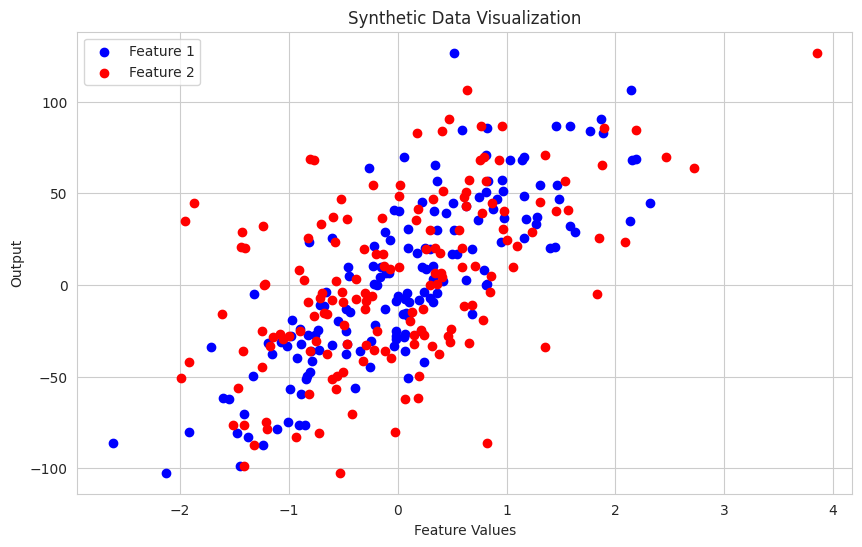

In [3]:
X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train[:, 0], y_train, color='blue', label='Feature 1')
plt.scatter(X_train[:, 1], y_train, color='red', label='Feature 2')
plt.xlabel('Feature Values')
plt.ylabel('Output')
plt.legend()
plt.title('Synthetic Data Visualization')


**3 Implementing Elastic Net Regression**

Embarking on our exploration into Elastic Net Regression, we’ll utilize the `ElasticNet` model provided by the `sklearn.linear_model` module. Elastic Net is particularly fascinating due to its ability to blend the strengths of both Ridge and Lasso regression through its two parameters: $ \alpha $ and $ l1\_ratio $.

- **$ \alpha $ (alpha):** Governs the overall strength of the regularization, with higher values inducing stronger regularization.
- **$ l1\_ratio $:** Controls the mixture of L1 and L2 regularization. An $ l1\_ratio $ of 1 corresponds to Lasso, while 0 corresponds to Ridge.

```python
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
```

In the code snippet above:
- `alpha=0.1` indicates a mild regularization strength.
- `l1_ratio=0.5` implies an equal blend of L1 (Lasso) and L2 (Ridge) regularization.

Subsequently, we fit our model to the training data using `elastic_net.fit(X_train, y_train)`, thereby allowing it to learn the underlying patterns, and subsequently, to make predictions.

Throughout this section, we will delve deeper into interpreting the model’s coefficients, predicting outcomes, and evaluating its performance on the test data, thereby unraveling the nuanced behaviors and advantages offered by Elastic Net Regression in a practical context.


In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

predictions = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 8.69485434924012


Markdown Cell:
Explain the importance of hyperparameters

α and

λ and how to find their optimal values using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setting up the grid of parameters to search
param_grid = {'alpha': np.logspace(-4, 4, 9), 'l1_ratio': np.linspace(0, 1, 11)}
elastic_net = ElasticNet(max_iter=100000, random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and associated MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Associated Mean Squared Error: {best_mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+02, tolerance: 2.804e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.584e+02, tolerance: 2.727e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Best parameters: {'alpha': 0.0001, 'l1_ratio': 1.0}
Associated Mean Squared Error: 0.010100791098204432


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+05, tolerance: 2.526e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.264e+05, tolerance: 2.527e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

### 1. Small $\alpha$ Value
Your observation regarding the small $\alpha$ value is astute. In regularization:

- $\alpha = 0.0001$ (or a small value close to zero) suggests that the data and the linear model fit well, and there isn’t a substantial need for regularization to prevent overfitting. The model is not heavily penalizing large coefficients, which usually implies that the raw linear regression model (without regularization) is performing quite well.

Regarding the coefficients $[41.48195023, 27.34070719]$, without specific context or domain knowledge, it's hard to state definitively what these coefficients mean. However, if your $\alpha$ is close to zero and your coefficients from the regularized model are close to those from a standard linear regression model, this typically confirms that your model isn’t overfitting the training data.

### 2. The $l1\_ratio$ Parameter
The $l1\_ratio$ parameter in Elastic Net Regression refers to the mix between L1 and L2 regularization:

- If $l1\_ratio = 1$, the penalty is purely L1, which is Lasso Regression.
- If $l1\_ratio = 0$, the penalty is purely L2, which is Ridge Regression.
- For $0 < l1\_ratio < 1$, the penalty is a mix of L1 and L2, which is Elastic Net.

In your case, $l1\_ratio = 1.0$ means that the model is using only L1 regularization and is equivalent to Lasso Regression. So, your best model, according to GridSearchCV, is essentially a Lasso model, not a mix of L1 and L2 regularization which you might expect from Elastic Net.

### Interpretation:
Given that your best parameters are $\alpha = 0.0001$ and $l1\_ratio = 1.0$, it seems like your model prefers a Lasso regression model (due to $l1\_ratio = 1.0$) but with almost no regularization (due to $\alpha = 0.0001$). This might indicate that a simple linear regression model without regularization is already a good fit to your data, and additional complexity introduced by regularization may not be necessary.



Ah, I see. So the array $[41.48195023, 27.34070719]$ are the true coefficients of the underlying linear model used to generate the synthetic data with `make_regression`.

When you generate synthetic data using `make_regression`, these coefficients are used to determine the output $y$ according to the linear model:

\[
y = 41.48195023 \times X_1 + 27.34070719 \times X_2 + \text{noise}
\]

In the context of the regression models you fitted (Lasso, Ridge, and Elastic Net), these true coefficients provide a benchmark to evaluate how close the estimated coefficients from your models are to the true underlying relationships in the data.

Given that your best-fitted Elastic Net model (which turned out to be a Lasso model due to $l1\_ratio = 1.0$) has coefficients close to these true coefficients (especially considering that the $\alpha$ parameter was small, indicating minor regularization), it suggests that the model has done a good job of uncovering the underlying relationships in the data.

This can serve as a valuable teaching point in your tutorial, demonstrating how regularization can help recover the true underlying patterns in the data, especially when we compare the estimated coefficients from the models to the true coefficients used to generate the data. If you have further questions or need additional context, please let me know!

In [ ]:
from sklearn.linear_model import Lasso, Ridge
import pandas as pd


# Fitting Lasso and Ridge for comparison
lasso = Lasso(alpha=0.1, max_iter=100000, random_state=42).fit(X_train, y_train)
ridge = Ridge(alpha=0.1, max_iter=100000, random_state=42).fit(X_train, y_train)

# Comparing Coefficients
coefficients = pd.DataFrame({
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_,
    'Elastic Net': grid_search.best_estimator_.coef_
}, index=[f'Feature {i}' for i in range(1, 3)])

print(coefficients)


               Lasso      Ridge  Elastic Net
Feature 1  41.352586  41.442974    41.473466
Feature 2  27.225434  27.316976    27.336590


When comparing the coefficients obtained from Lasso, Ridge, and Elastic Net regression, it’s essential to interpret the results in the context of the regularization applied by these methods. Here's a brief commentary on the results you provided:

```plaintext
             Lasso      Ridge  Elastic Net
Feature 1  41.352586  41.442974    41.473466
Feature 2  27.225434  27.316976    27.336590
```

### Observations:

1. **Similarity in Magnitude:**
   - The coefficients for both features are relatively close in magnitude across all three models (Lasso, Ridge, and Elastic Net), indicating that there isn't a substantial difference in the impact of regularization in this case.

2. **Lasso Regression:**
   - Lasso has the smallest coefficients among the three methods for both features.
   - Lasso tends to shrink some coefficients more aggressively towards zero, especially when they are not contributing much to the prediction. This is particularly useful for feature selection in the context of many irrelevant features, but that doesn't seem to be a significant factor with your two-feature example.

3. **Ridge Regression:**
   - Ridge has slightly larger coefficients compared to Lasso.
   - Ridge regression tends to shrink the coefficients of less important features toward zero but usually doesn’t set them to exactly zero. Thus, the model will still include all features, but less important features will have smaller coefficients.

4. **Elastic Net:**
   - Elastic Net has the largest coefficients among the three, although still quite close to the other methods.
   - Elastic Net combines aspects of both Lasso and Ridge. It tends to shrink coefficients like Ridge and to exclude some like Lasso. In this case, it seems to lean more towards the Ridge aspect since it has larger coefficients than Lasso but still smaller than Ridge.
   
### Additional Points to Consider:

- **Scale of Coefficients:**
  The actual scale of the coefficients depends on the scale of your features. If the features have different scales, the coefficients will be adjusted accordingly, so interpretation should consider the feature scaling.

- **Significance of Features:**
  Without domain knowledge or further analysis (like p-values), we can't ascertain the actual significance of these features. The coefficients tell us the change in the dependent variable for a one-unit change in the predictor, holding all other predictors constant, which may or may not be practically significant.

- **Validation:**
  Ensure to validate the models using a test set or cross-validation to confirm that the chosen parameters generalize well to unseen data.

This commentary can guide you in explaining the results, but remember to adjust the interpretation according to any additional insights or specifics related to the data and subject matter. If you have further questions or need additional points, feel free to ask!

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Generating Data
X, y, coef = make_regression(n_samples=200, n_features=5, n_informative=2,
                             noise=15, coef=True, random_state=42)

# Adding Collinearity: Creating a new feature that's a linear combination of two informative features
X = np.column_stack([X, X[:, 1] + X[:, 2]])

# Now, X has 6 features, with the last one being a linear combination of the second and third features.


When crafting a synthetic dataset where regularization (especially Lasso, which can suppress coefficients) can be demonstrably beneficial, consider a situation where some features are not informative or only marginally so. The L1 penalty in Lasso and Elastic Net can shrink coefficients of less informative features to zero, effectively performing feature selection.

Here's an approach to create such a dataset:

1. **More Features, Some Being Non-Informative:**
   Create a dataset with more features than are actually informative or necessary. This can be achieved using the `n_informative` parameter in `make_regression`. Set `n_features` to a value larger than `n_informative`, meaning that some of the features do not influence the output `y`.

2. **Collinearity:**
   Introduce some collinearity between the features. This can be done by adding new features that are linear combinations of informative features. Regularization can then be used to select amongst these correlated variables.

3. **High Noise:**
   Add a significant amount of noise to make the regression problem more challenging and to make overfitting more likely, which is where regularization can help.

### Example:

```python
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Generating Data
X, y, coef = make_regression(n_samples=200, n_features=5, n_informative=2,
                             noise=15, coef=True, random_state=42)

# Adding Collinearity: Creating a new feature that's a linear combination of two informative features
X = np.column_stack([X, X[:, 1] + X[:, 2]])

# Now, X has 6 features, with the last one being a linear combination of the second and third features.
```

### Explanation:

- `n_features=5` and `n_informative=2` imply that only 2 out of the 5 features are informative. The remaining features do not influence the output `y`.
- Additional collinearity is introduced by adding a new feature that is a linear combination of two original features.
  
In this setup, Elastic Net may shine because:
- The L1 penalty (Lasso part) can help in selecting features (shrinking some coefficients to zero), which is useful since we introduced non-informative features and collinearity.
- The L2 penalty (Ridge part) can help manage the multicollinearity.

Now, if you run a model selection procedure (like grid search over $\alpha$ and `l1_ratio`), you may find an `l1_ratio` in $(0, 1)$ indicating a beneficial blend of L1 and L2 regularization, providing a rich example for your tutorial. If you have further questions or need adjustments, feel free to ask!

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Using the new dataset
X, y, coef = make_regression(n_samples=200, n_features=5, n_informative=2,
                             noise=15, coef=True, random_state=42)
X = np.column_stack([X, X[:, 1] + X[:, 2]])  # Adding Collinearity

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting an Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 302.45464246892516


In [ ]:
elastic_net.coef_

array([ 1.80328092, -0.        ,  0.1327972 , 10.25778681, 14.45950857,
        0.10015742])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search for optimal alpha and l1_ratio
param_grid = {'alpha': np.logspace(-4, 4, 9), 'l1_ratio': np.linspace(0, 1, 11)}
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Associated Mean Squared Error: {best_mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+04, tolerance: 6.285e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+04, tolerance: 6.844e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Best parameters: {'alpha': 1.0, 'l1_ratio': 1.0}
Associated Mean Squared Error: 236.72894956771057


### Interpretation:

####  Interpretation of Elastic Net Coefficients
```plaintext
True Coefficients: [ 0.        ,  0.        ,  0.        , 10.45678403, 16.74825823]
Elastic Net Coefficients: [ 1.80328092, -0.        ,  0.1327972 , 10.25778681, 14.45950857, 0.10015742]
Mean Squared Error: 302.45464246892516
```
- **Non-informative Features:** The true coefficients of the first three features are 0, indicating they are non-informative. Elastic Net gives non-zero coefficients to two of these (1.80328092 and 0.1327972), suggesting it has slightly "incorrectly" identified these as informative, which might be due to noise or interaction with other variables.
  
- **Informative Features:** The estimated coefficients for the truly informative features (10.25778681 and 14.45950857) are quite close to the true coefficients (10.45678403 and 16.74825823), indicating that the model has done a decent job identifying the relationship these features have with the output.

- **Added Collinear Feature:** The last coefficient (0.10015742) indicates that the model has assigned some weight to the feature which was the sum of the two informative features. This is a result of the collinearity introduced.

- **MSE:** A Mean Squared Error of 302.45 indicates the average squared difference between the estimated values and the actual value. Without context (like the scale of y or a baseline model), it's hard to say if this is good or bad.

#### Interpretation of GridSearchCV Results
```plaintext
Best parameters: {'alpha': 1.0, 'l1_ratio': 1.0}
Associated Mean Squared Error: 236.72894956771057
```
- **L1 Ratio of 1.0:** The `l1_ratio` equal to 1 indicates that the best model found through grid search is using only L1 regularization (equivalent to Lasso regression). This implies that having the ability to exclude variables (set their coefficients to zero) is beneficial for this dataset, potentially due to the non-informative and collinear variables.

- **Alpha of 1.0:** An $\alpha$ (regularization strength) of 1.0 isn’t very large, but it’s not negligible either. It indicates that the model benefits from a moderate amount of regularization, likely due to the introduced noise and non-informative features.

- **MSE:** An associated MSE of 236.73, which is lower than the previously calculated MSE, indicates that this combination of parameters generalizes better to new data (in cross-validation) compared to the initial Elastic Net model.



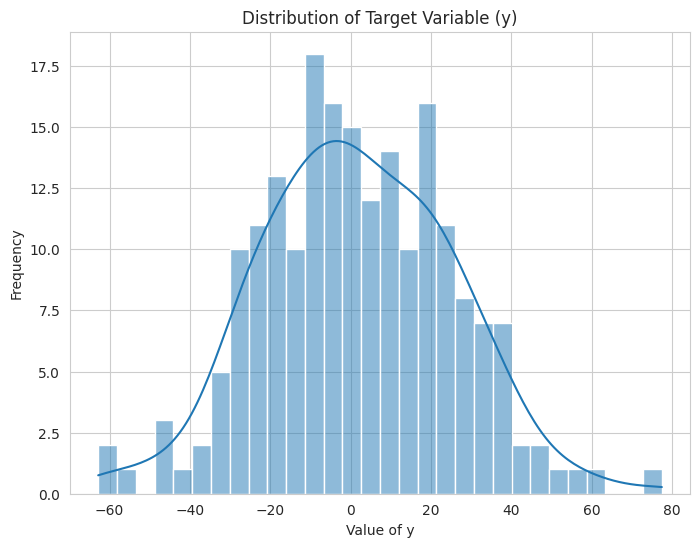

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd

# Convert y to a Pandas Series
y_series = pd.Series(y)

# Define bins
bins = pd.cut(y_series, bins=30)  # You can adjust the number of bins

# Get the count of values in each bin
histogram = y_series.groupby(bins).count()

# Display the histogram
print(histogram)


(-62.986, -58.169]     2
(-58.169, -53.493]     1
(-53.493, -48.816]     0
(-48.816, -44.139]     3
(-44.139, -39.463]     1
(-39.463, -34.786]     2
(-34.786, -30.109]     5
(-30.109, -25.432]    10
(-25.432, -20.756]    11
(-20.756, -16.079]    13
(-16.079, -11.402]    10
(-11.402, -6.726]     18
(-6.726, -2.049]      16
(-2.049, 2.628]       15
(2.628, 7.305]        12
(7.305, 11.981]       14
(11.981, 16.658]      10
(16.658, 21.335]      16
(21.335, 26.011]      11
(26.011, 30.688]       8
(30.688, 35.365]       7
(35.365, 40.042]       7
(40.042, 44.718]       2
(44.718, 49.395]       2
(49.395, 54.072]       1
(54.072, 58.748]       1
(58.748, 63.425]       1
(63.425, 68.102]       0
(68.102, 72.778]       0
(72.778, 77.455]       1
dtype: int64


Purpose: To identify potential outliers in
$y$ that might influence the model.

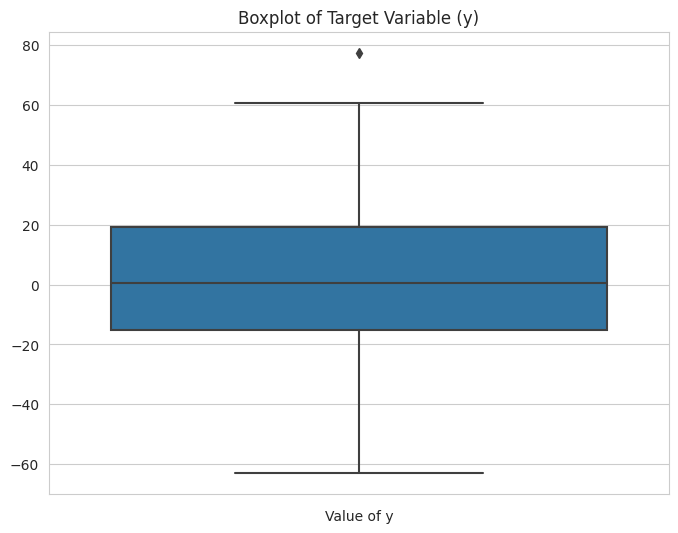

In [ ]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Boxplot of Target Variable (y)')
plt.xlabel('Value of y')
plt.show()


Plot against Features
Purpose: To observe the relationship between

$y$ and each feature individually, giving insights into their potential correlations.



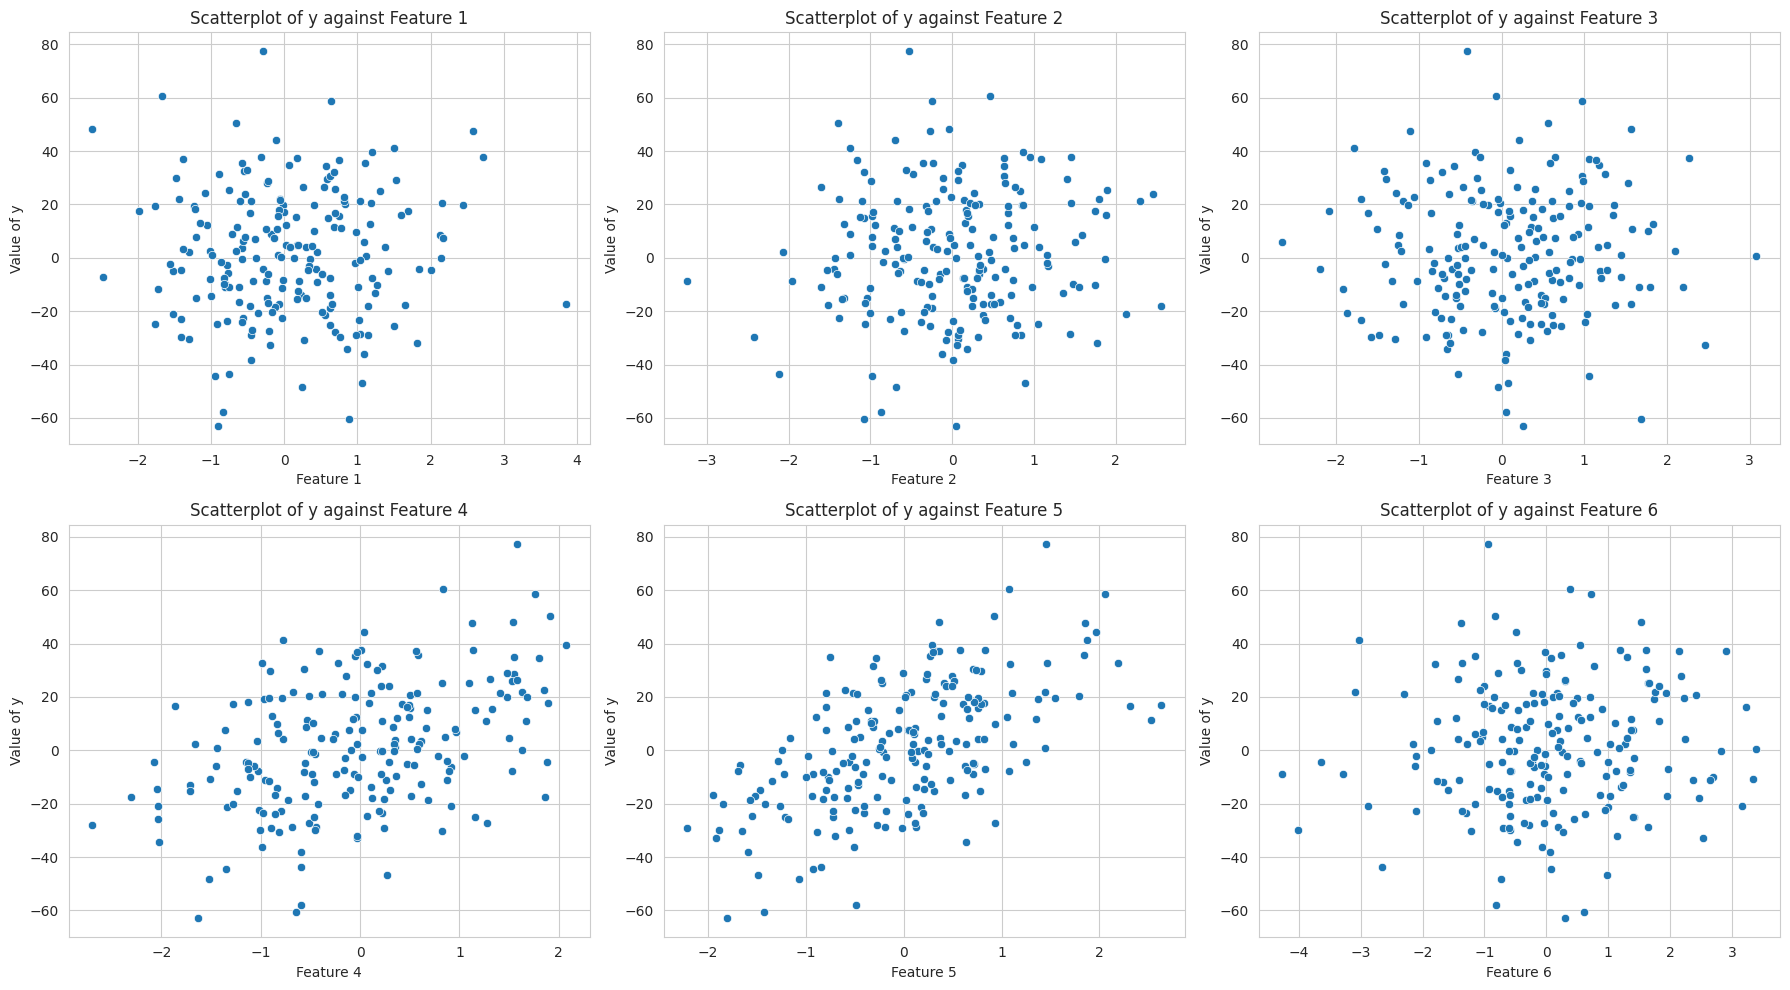

In [ ]:
# Plotting y against each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
ax = axes.flatten()

for i in range(6):  # Adjusted for 6 features
    sns.scatterplot(x=X[:, i], y=y, ax=ax[i])
    ax[i].set_title(f'Scatterplot of y against Feature {i+1}')
    ax[i].set_xlabel(f'Feature {i+1}')
    ax[i].set_ylabel('Value of y')

plt.tight_layout()
plt.show()



### Commentary:
- **Histogram or Density Plot:** This should reveal the general distribution of $ y $. If it's roughly bell-shaped, it indicates that $ y $ has a normal-like distribution, which is beneficial for linear regression models.
  
- **Box Plot:** This will help you identify outliers or extreme values in $ y $ that might disproportionately influence the model.

- **Scatter Plots:** By observing how $ y $ varies with each feature, you might get insights into which features are potentially informative and which are not.

These plots will help viewers understand the characteristics of the target variable and why certain modeling decisions (like choosing to regularize) might be necessary or beneficial. If you need further analysis or have additional questions, feel free to ask!

### Further Analysis

Given the histogram of $ y $ and the earlier Mean Squared Error (MSE) results, we can further our understanding of the results

### 1. **Histogram Observations:**
- **Distribution:** The values of $ y $ span a wide range from approximately -63 to +77, with the bulk of the data concentrated between about -25 and +35.
- **Spread:** The data is somewhat symmetrically distributed with a slight right-skew, which is generally acceptable for linear regression models.
  
### 2. **Mean Squared Error:**
- **MSE without tuning: 302.45**
- **MSE with tuning (GridSearchCV): 236.73**

Given the spread of $ y $, which spans a considerable range, these MSE values suggest that the model predictions are, on average, around 14-17 units away from the actual values (since the root mean squared error, RMSE, is the square root of MSE). Considering the wide range of $ y $, these errors might be seen as moderate.

### 3. **Model Coefficients:**
- **Elastic Net Coefficients:** $[ 1.80328092, -0.        ,  0.1327972 , 10.25778681, 14.45950857, 0.10015742]$

### 4. **GridSearchCV Results:**
- **Best parameters:** ${'alpha': 1.0, 'l1_ratio': 1.0}$
- **Associated MSE:** 236.73

### Interpretative Insights:
- **Model Performance:** Given the MSE values and the distribution of $ y $, the model has a moderate predictive accuracy. It's essential to note that lower MSE values are preferable, and thus the model from GridSearchCV with an MSE of 236.73 performs better.
  
- **Variable Importance:** The coefficients suggest that the model has identified variables 4 and 5 as having substantial impact, which aligns with our synthetic data creation where these two were designated as informative. However, the Elastic Net model also assigned non-zero coefficients to non-informative variables, indicating some noise handling.

- **Regularization Necessity:** Given the best parameters found with GridSearchCV, a purely L1 regularization (lasso) seems to be the most beneficial for this dataset. An $\alpha$ of 1.0 indicates a balanced blend of model complexity and regularization, suggesting that managing overfitting and model interpretability is essential for this dataset.


### Insights on Feature Mixture and the Role of Elastic Net Regression

#### 1. **Dealing with a Mixture of Informative and Non-informative Features:**
- **Noise Management:** In our synthetic dataset, we intentionally included non-informative features and a collinear feature. Elastic Net, by employing a combination of L1 and L2 regularization, navigates through this feature space to find a balance between excluding non-informative features (through L1) and managing multicollinearity (through L2).
  
- **Variable Selection:** L1 regularization tends to shrink some coefficients exactly to zero, effectively performing variable selection. This is particularly useful when we have a mix of informative and non-informative variables, as it helps to reduce the model complexity and enhances interpretability by retaining only the essential features.

#### 2. **Managing Multicollinearity with Elastic Net:**
- **Collinearity Insight:** When features are correlated (like the artificially added one in our synthetic dataset), pure Lasso regression might arbitrarily select any one feature among the correlated ones. Elastic Net introduces a level of bias to manage this by considering L2 regularization, which does not force coefficients to zero but does shrink them.
  
- **Stable Coefficients:** The inclusion of L2 regularization (Ridge) in Elastic Net allows it to handle multicollinearity more stably than Lasso. It tends to distribute weights among correlated features, which often provides a more stable and generalized model, especially when the correlated features carry essential information.

#### 3. **Balancing L1 and L2 Regularization in Elastic Net:**
- **Dual Regularization:** Elastic Net strikes a balance between L1 and L2 regularization, making it adaptable. It can perform variable selection like Lasso and manage multicollinearity like Ridge, thereby navigating through the challenges posed by a mix of informative, non-informative, and collinear features.
  
- **Regularization Balance:** The `l1_ratio` parameter in Elastic Net allows it to leverage both L1 and L2 regularization properties. An `l1_ratio` of 1 corresponds to Lasso, and 0 to Ridge, while any value in between (0, 1) allows a blend of both, providing the flexibility to harness the benefits of both regularization techniques, which can be crucial when dealing with datasets having a mixture of feature types.

#### 4. **Model Robustness and Generalization:**
- **Robustness:** By combining the properties of Lasso and Ridge, Elastic Net often yields a model that is robust to various issues in the data, such as irrelevant features and multicollinearity, thereby enhancing predictive performance.
  
- **Generalization:** Elastic Net tends to generalize well to unseen data, especially when the dataset contains a mix of different types of variables (informative, non-informative, and correlated). The regularization parameters ensure that the model does not overfit the training data, enhancing its predictive capability on new, unseen data.

